   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

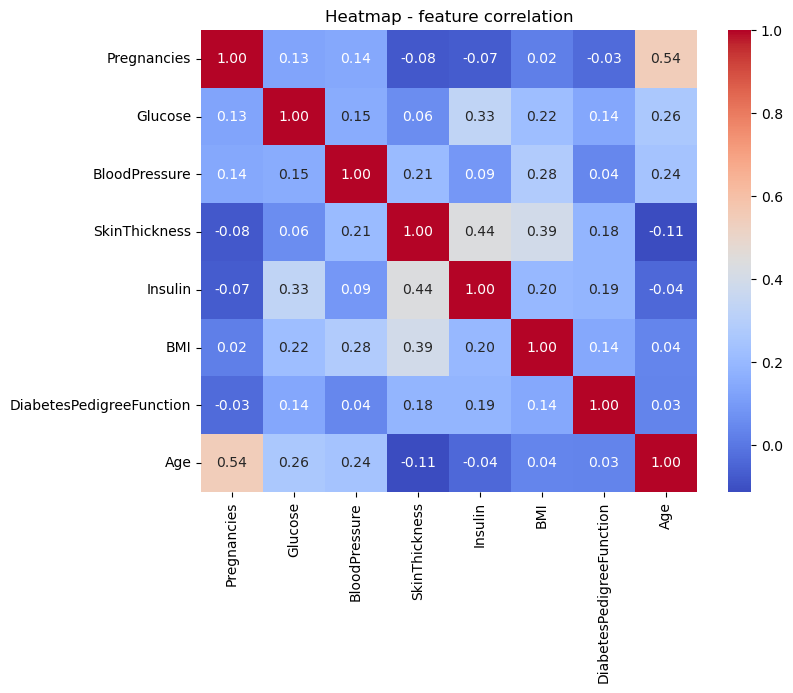

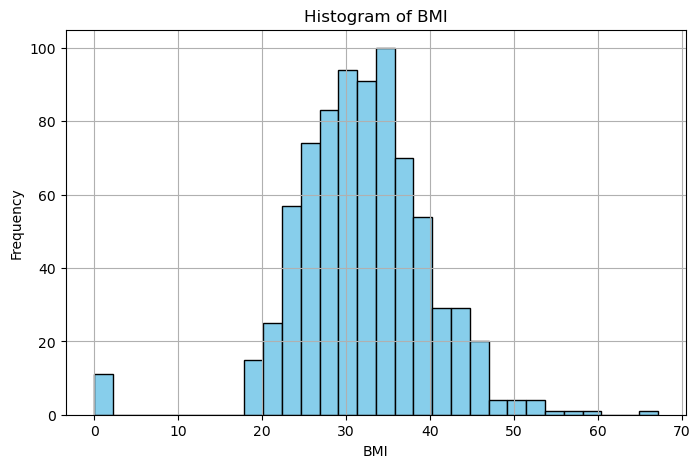

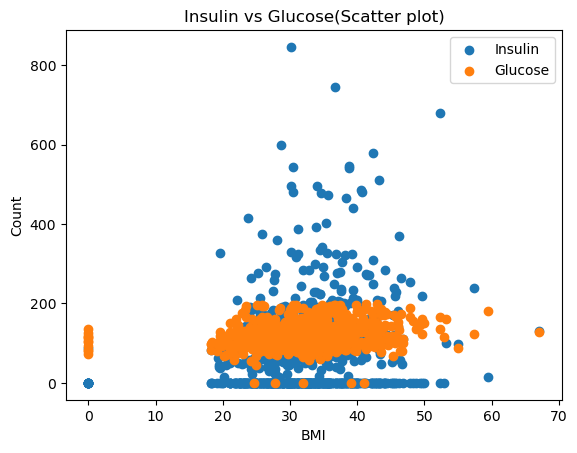

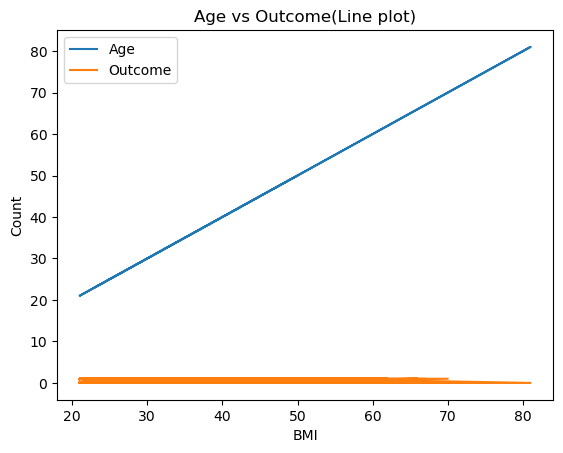

Accuracy: 0.7402597402597403
[[75 24]
 [16 39]]
Not Diabetic


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#loading of data
df = pd.read_csv("diabetes.csv")
print(df.head())
print(df.describe())

#Exploring The data
plt.figure(figsize=(8,6))
corr = df.drop(columns=["Outcome"]).corr()
sns.heatmap(corr, annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap - feature correlation")
plt.show()

#histogram
plt.figure(figsize=(8, 5))
plt.hist(df['BMI'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#scatterplot
plt.scatter(df['BMI'],df['Insulin'],label = 'Insulin')
plt.scatter(df['BMI'],df['Glucose'],label = 'Glucose')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Insulin vs Glucose(Scatter plot)')
plt.legend()
plt.show()

#lineplot
plt.plot(df['Age'],df['Age'],label = 'Age')
plt.plot(df['Age'],df['Outcome'],label = 'Outcome')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Age vs Outcome(Line plot)')
plt.legend()
plt.show()

#Evaluate Model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X = pd.get_dummies(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
# Initialize and train a decesion tree classifier
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

#predict and evluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))

# Example: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
sample = np.array([[2, 120, 70, 20, 85, 25.0, 0.5, 32]])
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)

print("Diabetic" if prediction[0] == 1 else "Not Diabetic")


